In [1]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import numpy as np

from skimage.exposure import histogram
from matplotlib.pyplot import bar


In [2]:

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

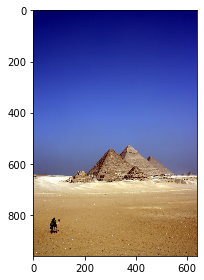

In [3]:
# Ex: imread and imshow 
pyramids = io.imread('pyramids.jpeg')
io.imshow(pyramids)
io.show()



In [4]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')

In [5]:
'''
@TODO:
Requirement #1 
-Read and print image 'coffee'  
-Show and print half of the  image
-----hint :use the attribute shape of numpy to get the image object dimentions
'''


"\n@TODO:\nRequirement #1 \n-Read and print image 'coffee'  \n-Show and print half of the  image\n-----hint :use the attribute shape of numpy to get the image object dimentions\n"

Shape of the image: (446, 640, 3)


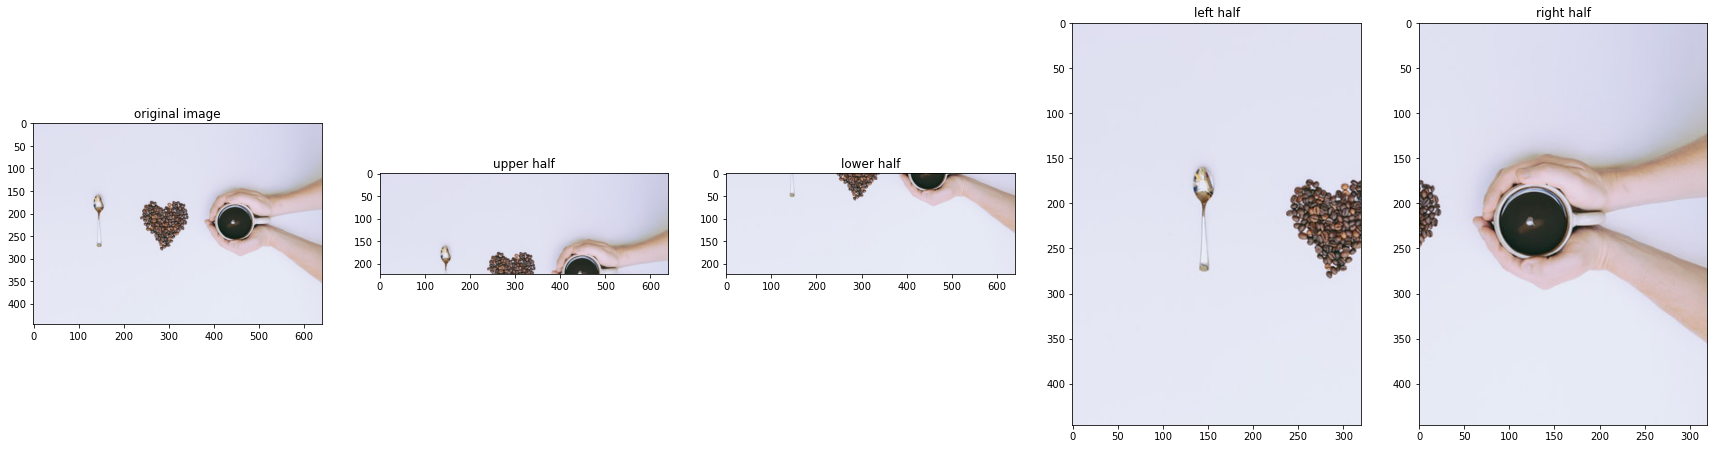

In [6]:
# read the image
coffee = io.imread('coffee.jpeg')

#shape of the image
shape = coffee.shape
print("Shape of the image: " + str(shape))

upperHalf = coffee[0:shape[0]//2]
lowerHalf = coffee[shape[0]//2:]
leftHalf = coffee[:,0:shape[1]//2]
rightHalf = coffee[:,shape[1]//2:]

images = [coffee, upperHalf, lowerHalf, leftHalf, rightHalf]
titles = ["original image", "upper half", "lower half", "left half", "right half"]
show_images(images, titles)

In [7]:
'''
@TODO:
Requirement #2 
RGB to gray and HSV:
1- Write a function 'gray_image' that takes an image as input , then
    -get the gray scale of the image, then
    -display original image and the gray scale one side by side (subplot).
    -hint: use rgb2gray to get the graylevel of the image
- test your function with the image 'pyramids'
    
2- Write a function 'HSV_image' that takes an image as input , then
   -show the RGB image and the (3 channels of HSV image each channel in separated form ) one side by side (subplot).
   -hint: -use rgb2hsv (to get the hsv representation of the image).
          -To separately get the Hue, Saturation and Value channels, use hsvImg[:,:,X], 
           where hsvImg is the hsv representation of the image. 
           Hue is the first channel, Saturation is the second and value is the last channel.
- test your function for the images in HSV Folder. And comment on the results. 
'''


"\n@TODO:\nRequirement #2 \nRGB to gray and HSV:\n1- Write a function 'gray_image' that takes an image as input , then\n    -get the gray scale of the image, then\n    -display original image and the gray scale one side by side (subplot).\n    -hint: use rgb2gray to get the graylevel of the image\n- test your function with the image 'pyramids'\n    \n2- Write a function 'HSV_image' that takes an image as input , then\n   -show the RGB image and the (3 channels of HSV image each channel in separated form ) one side by side (subplot).\n   -hint: -use rgb2hsv (to get the hsv representation of the image).\n          -To separately get the Hue, Saturation and Value channels, use hsvImg[:,:,X], \n           where hsvImg is the hsv representation of the image. \n           Hue is the first channel, Saturation is the second and value is the last channel.\n- test your function for the images in HSV Folder. And comment on the results. \n"

In [8]:
def grey_image(image):
    show_images([image, rgb2gray(image)],['image', 'greyscale'])


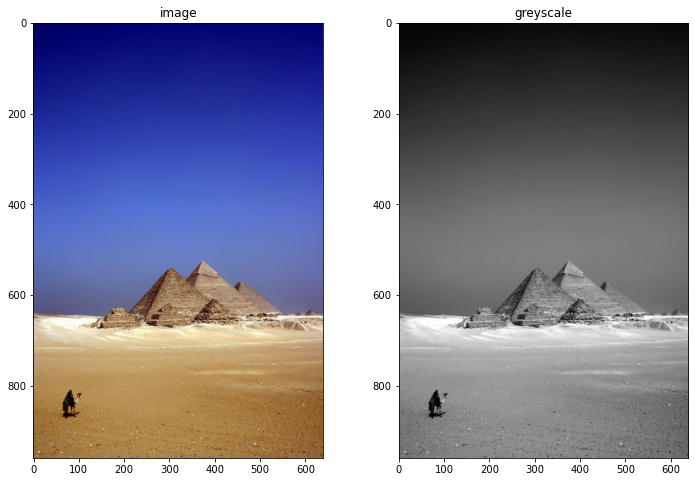

In [9]:
grey_image(pyramids)

In [10]:

'''HSV_image function'''
def HSV_image(image):
    hsv_image = rgb2hsv(image)
    hue_image = hsv_image[:, :, 0]
    saturation_image = hsv_image[:, :, 1]
    value_image = hsv_image[:, :, 2]
    show_images ([image,hue_image,saturation_image,value_image],['original image','hue channel','saturation channel','value channel'])
    

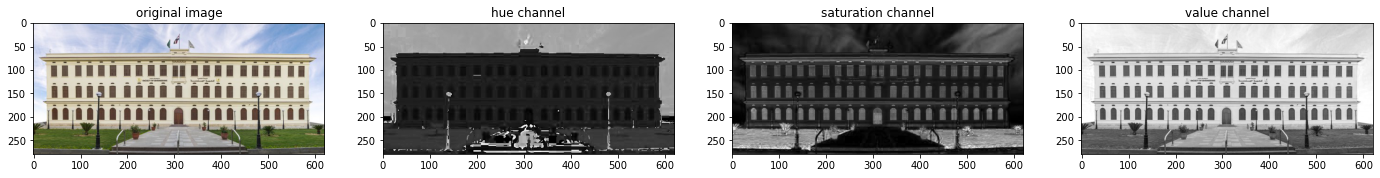

"\nThe hue channel shows dark/low values for the builing and the garden because of its yellowish and greenish color which is represented by small values in the hue specturm,\nmedium values for the sky since it's blueish and stands almost in the middle of the hue specturm.\n\nThe saturation channel shows very dark values for the brightest values 'closer to white' of the original image (building, sky,...) since it's represented by near-zero saturation values,\nand the opposite goes for the less bright colors (grarden, windows,...),\n\nThe value channel simply shows the different amounts of black for each color.\n"

In [11]:
HSV_image(io.imread('./hsv/ex1.png'))
'''
The hue channel shows dark/low values for the builing and the garden because of its yellowish and greenish color which is represented by small values in the hue specturm,
medium values for the sky since it's blueish and stands almost in the middle of the hue specturm.

The saturation channel shows very dark values for the brightest values 'closer to white' of the original image (building, sky,...) since it's represented by near-zero saturation values,
and the opposite goes for the less bright colors (grarden, windows,...),

The value channel simply shows the different amounts of black for each color.
'''


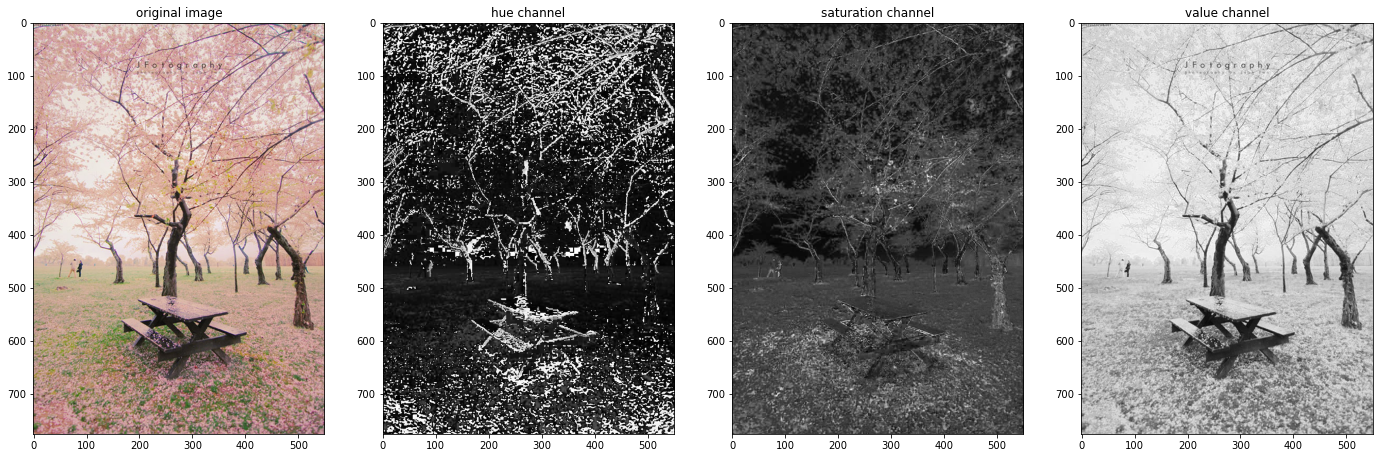

"\nThe hue channel is not very descriptive regarding this image of the amount of rapid transitions between colors and the leaves scattered everywhere.\n\nThe saturation channel shows very dark values for the lighter values 'closer to white' of the original image (shadows, sky,...) \nsince it's represented by near-zero saturation values,\nand the opposite goes for the less bright colors (, branches,...),\n\nThe value channel simply shows the greyscale of the image. <====\n"

In [12]:
HSV_image(io.imread('./hsv/ex2.jpg'))
'''
The hue channel is not very descriptive regarding this image of the amount of rapid transitions between colors and the leaves scattered everywhere.

The saturation channel shows very dark values for the lighter values 'closer to white' of the original image (shadows, sky,...) 
since it's represented by near-zero saturation values,
and the opposite goes for the less bright colors (, branches,...),

The value channel simply shows the greyscale of the image. <====
'''

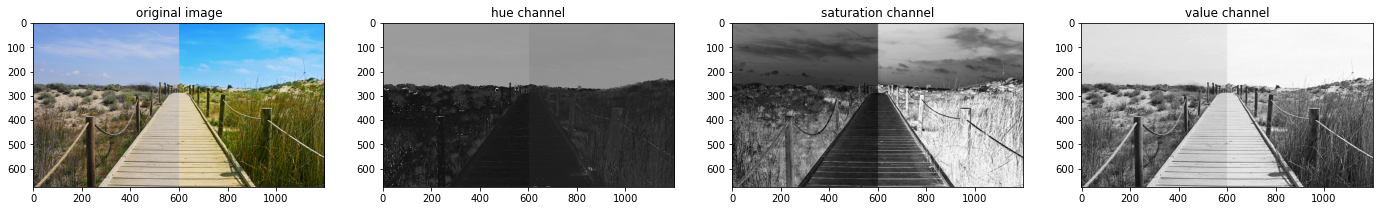

'\nThe image is split into two , the right half is very saturated which is visible in the stauration channel,\nas the saturation channel of the right half is brighter of the left half, which indicates the presence of higher staturation values.\n\n'

In [13]:
HSV_image(io.imread('./hsv/ex3.jpg'))
'''
The image is split into two , the right half is very saturated which is visible in the stauration channel,
as the saturation channel of the right half is brighter of the left half, which indicates the presence of higher staturation values.

'''


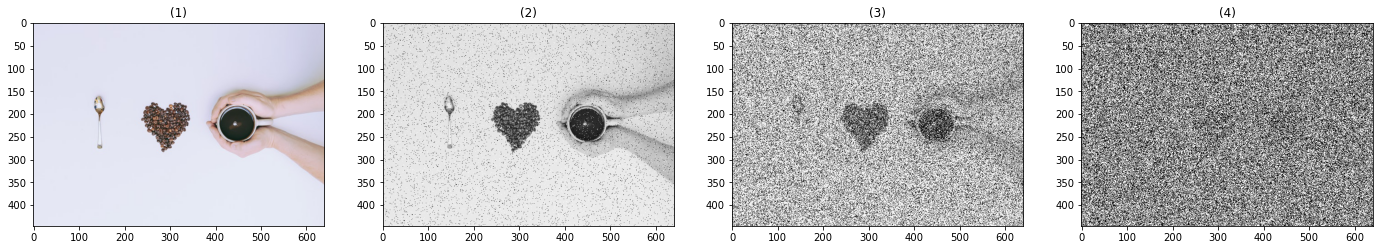

In [14]:
'''
Requirement 2 (Noise):
http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise

1.For an image of your choice (the effect of noise must be obvious): 
    Read the image.
    Convert it to greyscale.
    Apply salt & pepper noise with 
    amount=0.05, 0.5 and 0.9
   
2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    
    '''


'''Noise_func'''
def noise_func(image,amount):
    return random_noise(rgb2gray(image),mode='s&p',amount=amount)

coffee_image = io.imread('./coffee.jpeg')
show_images([coffee_image,noise_func(coffee_image,0.05),noise_func(coffee_image,0.5),noise_func(coffee_image,0.9)])


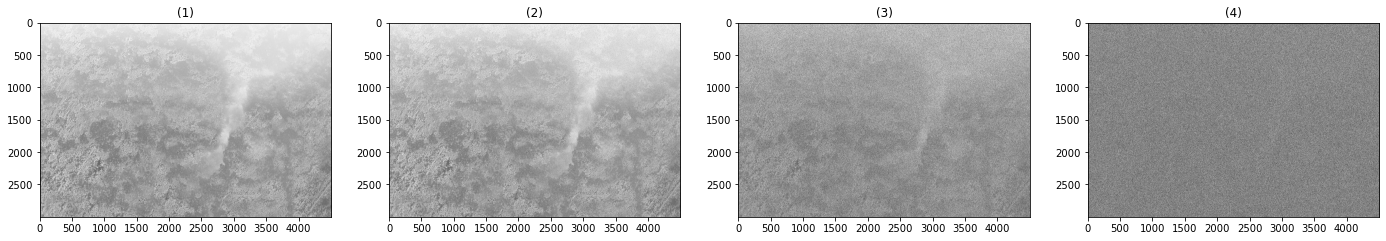

In [15]:
'''
The image that won't be greatly affected by the noise filter is the one below,
it's very random and has a huge varity of greyscale colors as displayed in the histogram below,
therfore the naked eye cannot differentiate between the image and the noise
'''
image1 = io.imread('./histogram/ex1.jpg')
# image2 = io.imread('./hsv/ex2.jpg')

show_images([image1,noise_func(image1,0.05),noise_func(image1,0.5),noise_func(image1,0.9)])
# show_images([image2,noise_func(image2,0.05),noise_func(image2,0.5),noise_func(image2,0.9)])


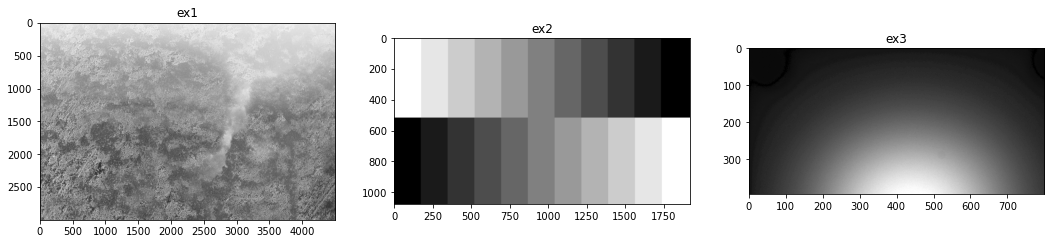

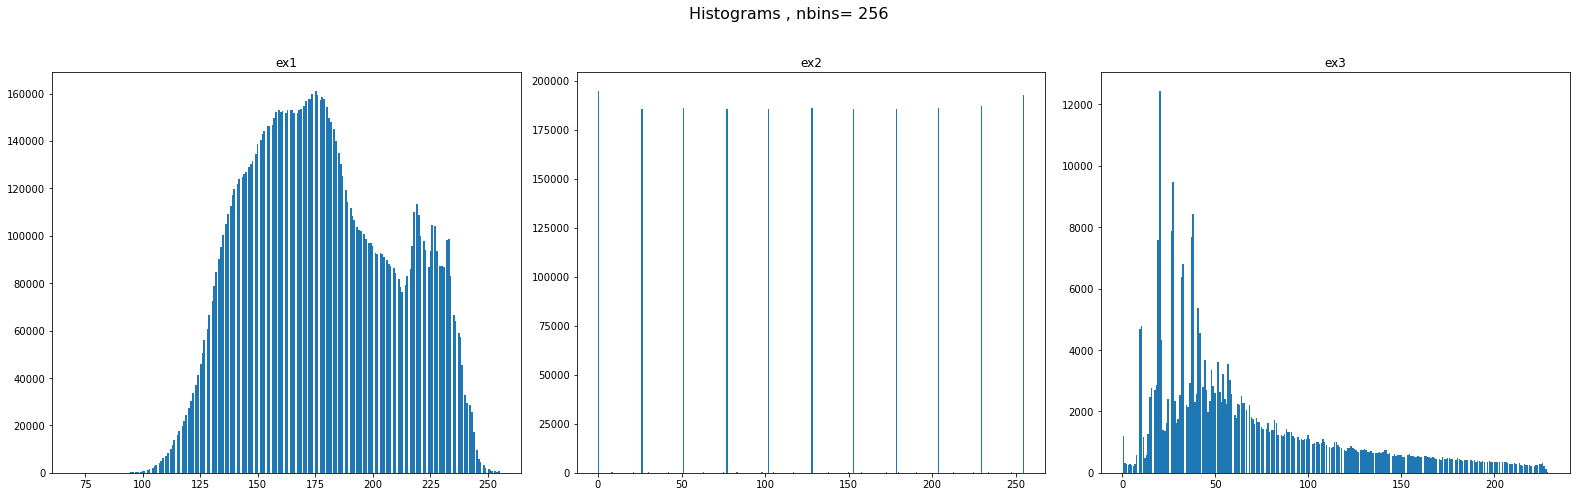

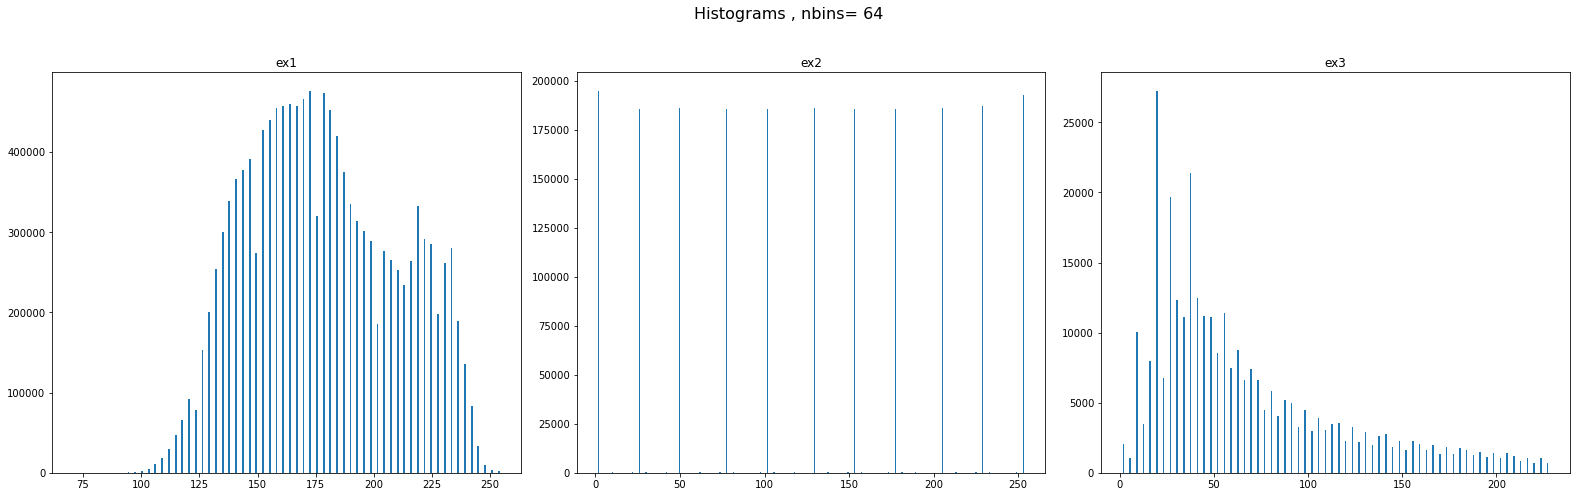

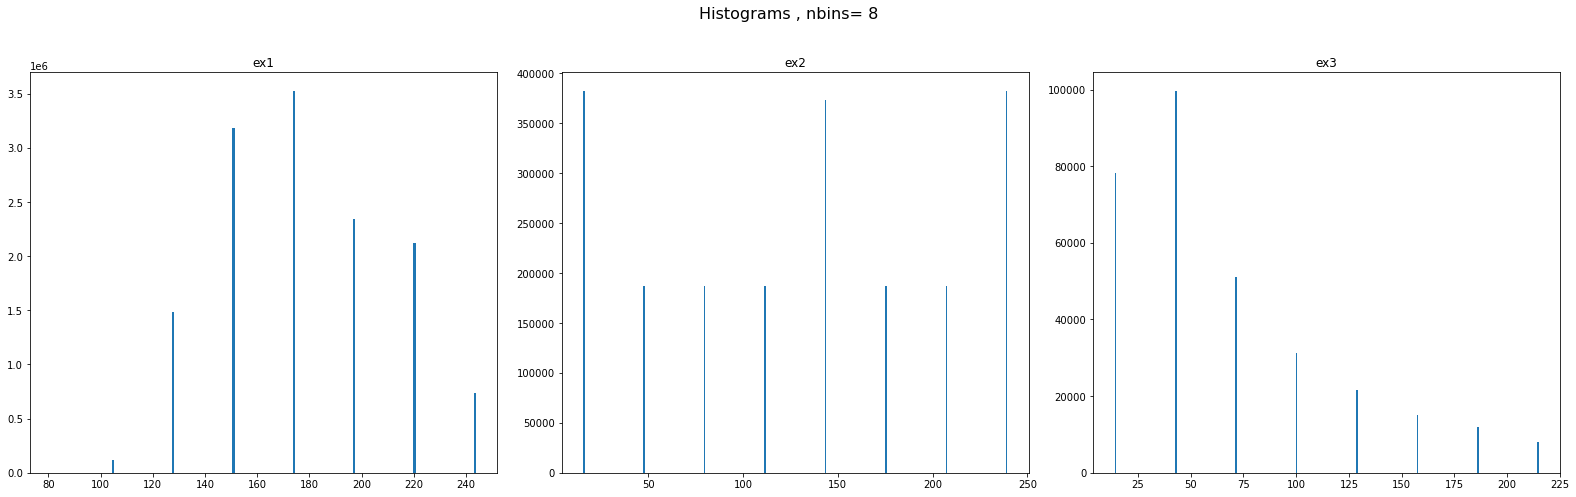

In [16]:
'''
Requirement 3 (Histogram):

1- For the given images ( in histogram folder): 
    Read the image.
    Apply histogram and show it.
Hint
    A) Use histogram (image) to get histogram. Try different values for nbins (256,64,8), What does it mean?
    B) and function(showHist) to draw it.
** 2- Draw a grey-scale image that has uniform histogram 
same number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.
use np.ones to draw image with ones.
'''
def showHistosinRow(images,titles= None, nbins = 256):
    '''
    this function is used to show multiple histograms in one row given an array of images and an array of associated titles. 
    
    Parameters
    -----------
    images: array of images
    titles: array of titles
    nbins: number of bins

    Returns
    -----------
        None 
    '''
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig, axs = plt.subplots(1, n_ims,  figsize=(22, 7))
    # fig.set_size_inches(fig.get_size_inches() * n_ims)
    
    n = 0
    for image,title in zip(images,titles):
        a = axs[n]
        imgHist = histogram(image, nbins=nbins)
        a.bar(imgHist[1]*255, imgHist[0] ,align='center') 
        a.set_title(title)
        n += 1
    fig.suptitle(f'Histograms , nbins= {nbins}', fontsize=16)
    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    plt.show() 



def plot_histogram(img, nbins=256):
    hist = histogram(img,nbins=nbins)
    showHist(img, hist)

ex1 = io.imread('./histogram/ex1.jpg', as_gray=True)
ex2 = io.imread('./histogram/ex2.png', as_gray=True)
ex3 = io.imread('./histogram/ex3.png', as_gray=True)
show_images([ex1,ex2,ex3],['ex1','ex2','ex3'])

# plot_histogram(ex1, nbins=256)
# plot_histogram(ex2, nbins=256)
# plot_histogram(ex3, nbins=256)
showHistosinRow([ex1, ex2, ex3], ['ex1', 'ex2', 'ex3'], 256)
showHistosinRow([ex1, ex2, ex3], ['ex1', 'ex2', 'ex3'], 64)
showHistosinRow([ex1, ex2, ex3], ['ex1', 'ex2', 'ex3'], 8)
# nbins manages the number of bins (groups or classes) in the histogram.
# increasing it will make the histogram more detailed and vice versa.






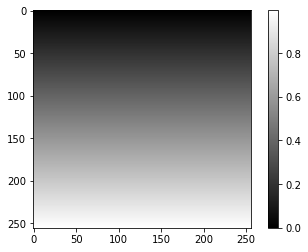

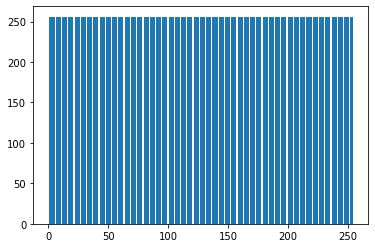

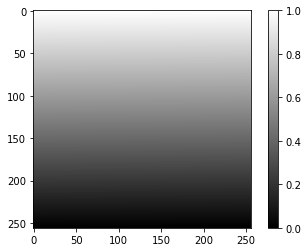

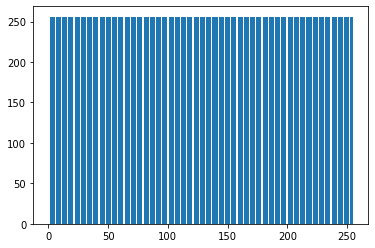

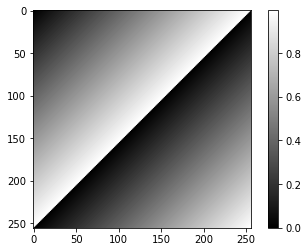

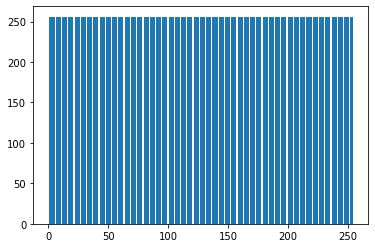

In [17]:
#2: Draw a grey-scale image that has uniform histogram
# same number of pixels for all intensity levels using code only. Let the size of the image be 256x256.
# use np.ones to draw image with ones.
img_size = (256, 256)
def uniform_histogram_image(size):
    image = np.ones(size)
    stepSize = 1 / size[0]
    for i in range(size[0]):
            image[i] = i * stepSize 
    return image

img1 = uniform_histogram_image(img_size)
plt.imshow(img1)
plt.colorbar()
ret = histogram(img1)
showHist(img1, ret)



#  Another Solution
plt.figure()
img2 = np.linspace(1, 0, img_size[0] * img_size[1]).reshape(img_size)
plt.imshow(img2)
plt.colorbar()
ret = histogram(img2)
showHist(img2, ret)


def uniform_histogram_image2(size):
    image = np.ones(size)
    stepSize = 1 / size[0]
    for i in range(size[0]):
        for j in range(size[1]):
            image[i][j] = (i + j) % 256 / 256.0
    return image
plt.figure()

img1 = uniform_histogram_image2(img_size)
plt.imshow(img1)
plt.colorbar()
ret = histogram(img1)
showHist(img1, ret)